<a href="https://colab.research.google.com/github/Axl11475581/TensorFlow-Certificate/blob/main/1_0_N_N_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem: predicting a numerical variable based on some other combination of variables, in short, predicting a number.

In [79]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


## Creating data to view and fit

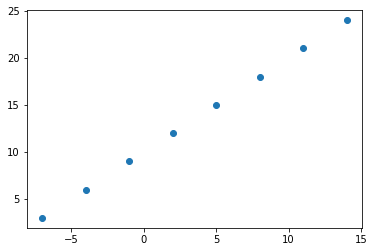

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualization
plt.scatter(X, y);

In [81]:
y == X + 10
# This function is what is expected for the NN to learn about the 
# relationship of X and y

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [82]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([93939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([93939700], dtype=int32)>)

In [83]:
X[0], y[0]

(-7.0, 3.0)

In [84]:
X[1], y[1]

(-4.0, 6.0)

In [85]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [86]:
X[0].ndim

0

In [87]:
# Turn the NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model. 
2. **Compiling a model** - define the loss function (in other words, the function which tells the model how wrong it is) and the optimizer (tells the model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of the model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [88]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 245ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [89]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [90]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [91]:
y_pred + 11 
# still a little far off from the actual value of y

array([[23.71602]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. ** Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [92]:
# Let's rebuild the model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time the model will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 264ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 5m

In [93]:
# view the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [94]:
# Let's see if the model's prediction has improve
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [95]:
# Larger Model

# 1. Create model
model = tf.keras.Sequential([
                           tf.keras.layers.Dense(100, activation="relu"),                                                
                           tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9863 - mae: 12.9863
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0173 - mae: 12.0173
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1308 - mae: 11.1308
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3345 - mae: 10.3345
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5212 - mae: 9.5212
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6917 - mae: 8.6917
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8487 - mae: 7.8487
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9853 - mae: 6.9853
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.0979 - mae: 6.0979
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

In [96]:
# Let's view the correct answers
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [97]:
# Let's try to make a prediction
model.predict([17.0])

array([[25.941917]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is: 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does the model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (original labels)?

In [98]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [99]:
# Make labels for the dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

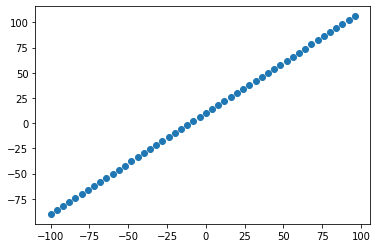

In [100]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [101]:
# Check the length of how many samples we have
len(X)

50

In [102]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing sample(20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in trianing and test sets, let's visualize it again

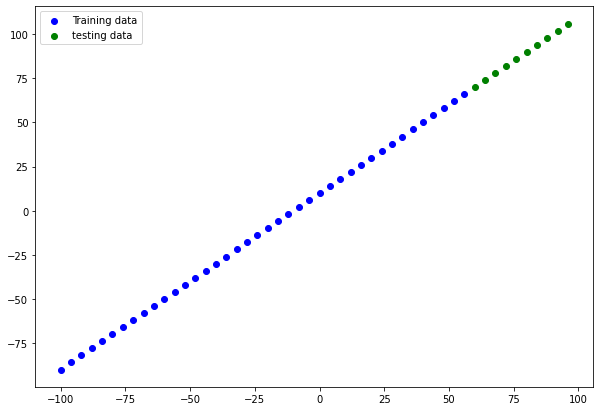

In [103]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c='g', label="testing data")
#Show a legend
plt.legend();

In [104]:
# Let's have a look at how to build a neural network for the data

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [105]:
# model.summary()
# This won't work due to the model not been built

In [106]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model(same as above, but passing the input_shape)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                             tf.keras.layers.Dense(1, name="output_layer")

], name="model_1")

#2. Compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [107]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [108]:
# Let's fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [109]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


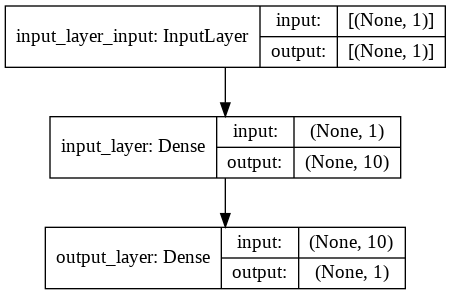

In [110]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions)

In [111]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [112]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [113]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label= "Test data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

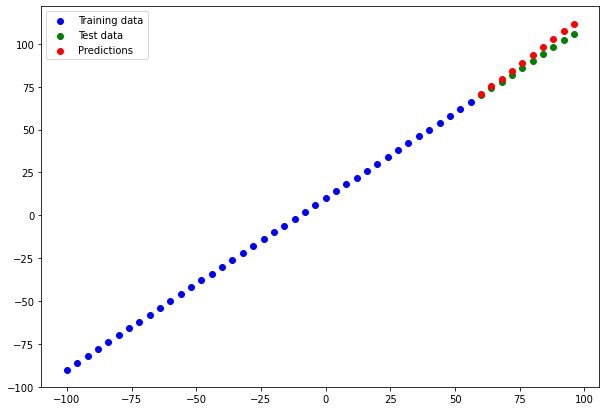

In [114]:
plot_predictions()

### Evaluating the model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance. 

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of the model's predictions"
* MSE - mean square error, "square the average errors"

In [115]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 99ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [116]:
# Calculate the mean absolute error
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [117]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [118]:
# y_test has not the same shape as y_pred and also y_pred is not a tensor
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [119]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [120]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [121]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [122]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve the model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give the model more of a chance to find patterns in the data. 

3 Modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [123]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

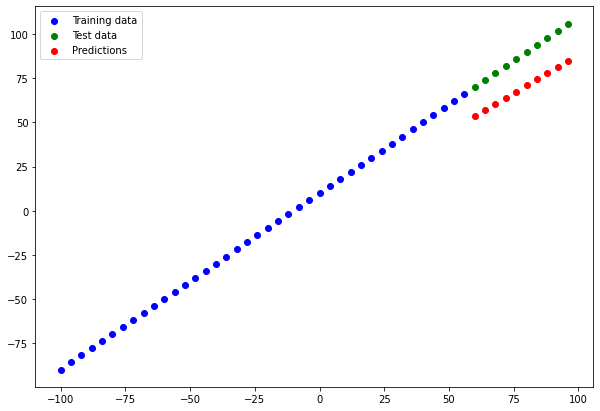

In [124]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [125]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build`model_2`**
* 2 dense layers, trained for 100 epochs

In [126]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 4ms/

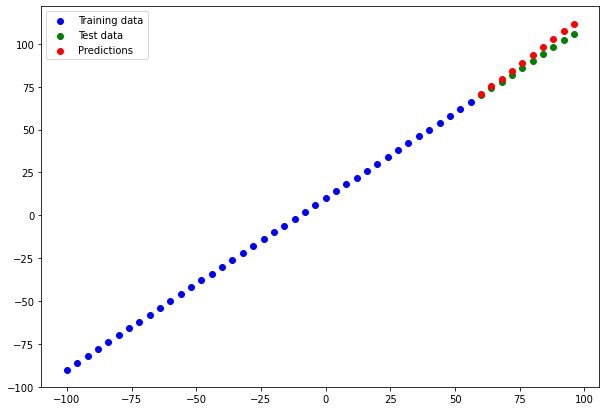

In [127]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [128]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [129]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 4ms/

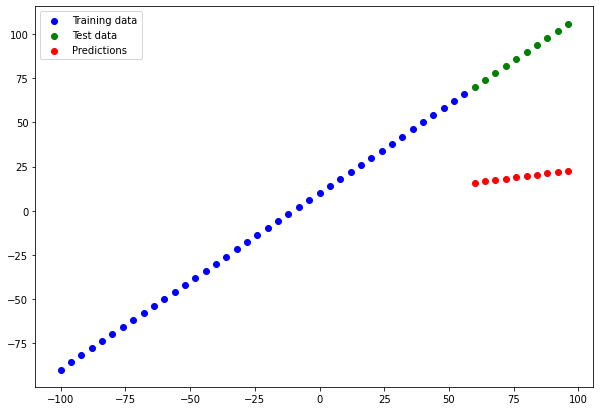

In [130]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [131]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

## Comparing the results of the experiments

We've run a few experiments, let's compare the results

In [132]:
# Let's compare the model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [133]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Trancking the experiments

One really good habit in ML modelling is to track the results of the experiments.
And when doing so, it can be tedious if you're running lots of experiments.

There are tools:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments(plugs to TensorBoard)


## Saving a model

Saving a model allows us to use them outside of Google Colab (or whereever they were trained) such as in a web application or a mobile app.

There are two main formats we can save the model's too:

1. The SavedModel format
2. The HDF5 format

In [134]:
# Save model using the SaveModel format
model_2.save("model_2_SaveModel_format")

INFO:tensorflow:Assets written to: model_2_SaveModel_format/assets


In [135]:
# Save model using the HDF5 format
model_2.save("model_2_HDF5_format.h5")

## Loading in a saved model

In [136]:
# Load in the SaveModel format model
loaded_savedModel_format = tf.keras.models.load_model("/content/model_2_SaveModel_format")
loaded_savedModel_format.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(X_test)
model_2_preds == loaded_savedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [138]:
# Load in the model in the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/model_2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compare model_2 predictions with .h5  model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

1. Go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there.

In [140]:
# Download a file from Google Colab
from google.colab import files
#files.download("/content/model_2_HDF5_format.h5")

## A Larger Example

In [141]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [145]:
# Let's try one-hot encode the DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [146]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [147]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [148]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [149]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [150]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [151]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Right now it looks like the model isn't performing too well, let's try to improve it!

In [153]:
# First experiment to improve the model, add a layer and change the optimizer
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [154]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [155]:
# Second experiment to improve the model, same as first but x2 epochs
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [156]:
# Evaluate the Second model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]